In [1]:
%matplotlib inline  
import numpy as np
import cv2 
import matplotlib.pyplot as plt


def carga_imagen_rgb(path):
    img_ori = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    return img_ori

def carga_imagen_gray(img_bgr):
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    return img_gray

In [2]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        #si el valor del pixel vecino es mayor o igual al pixel central, entonces 1
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        #Se requiere una excepción cuando valor del vecino del centro es nulo, es decir, valores en los límites.
        pass
    return new_value 

# Funcion para calcular LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
    val_ar = [] 
    #obtengo los valores de los pixel vecinos para luego comparar
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Convertir los valores binarios en decimales (**2)
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 

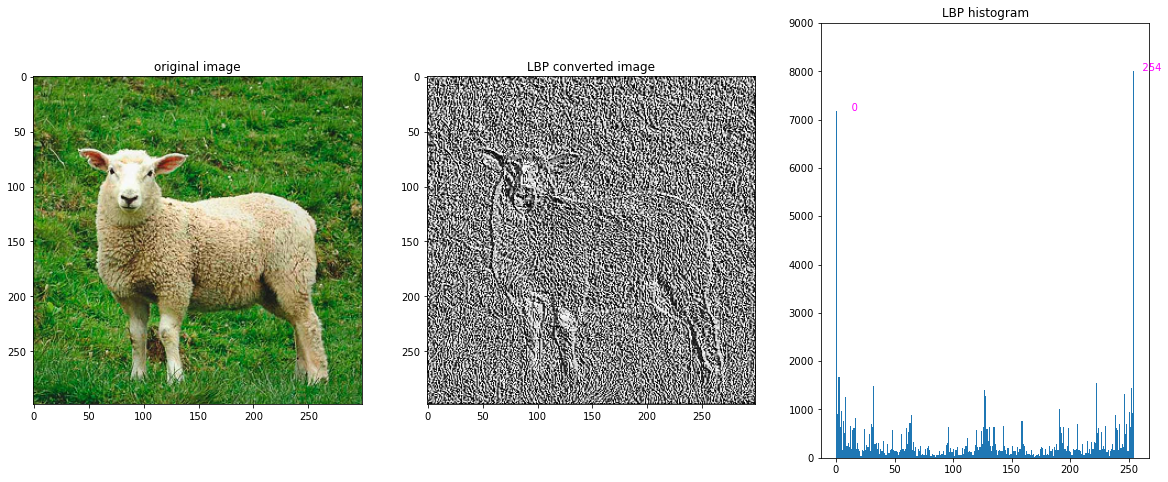

In [3]:
#leo imagen original
img_ori = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/oveja1.png')
#leo imagen en escala de grises
img_gray = carga_imagen_gray(img_ori)
plt.rcParams["figure.figsize"]=(16,9)


#obtengo el size de la imagen original
height, width, _ = img_ori.shape 

#creo array con el mismo height y width de la imagen original
img_lbp = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
        
vectorLBP = img_lbp.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,9000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

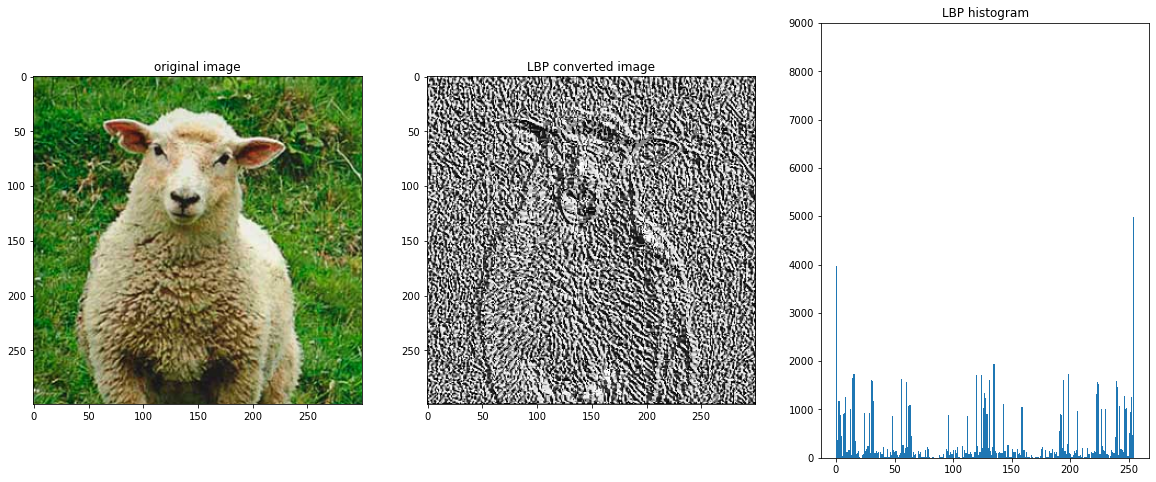

In [8]:
#leo imagen original
img_ori = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/oveja2.png')
#leo imagen en escala de grises
img_gray = carga_imagen_gray(img_ori)
plt.rcParams["figure.figsize"]=(16,9)


#obtengo el size de la imagen original
height, width, _ = img_ori.shape 

#creo array con el mismo height y width de la imagen original
img_lbp = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
        
vectorLBP = img_lbp.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,9000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

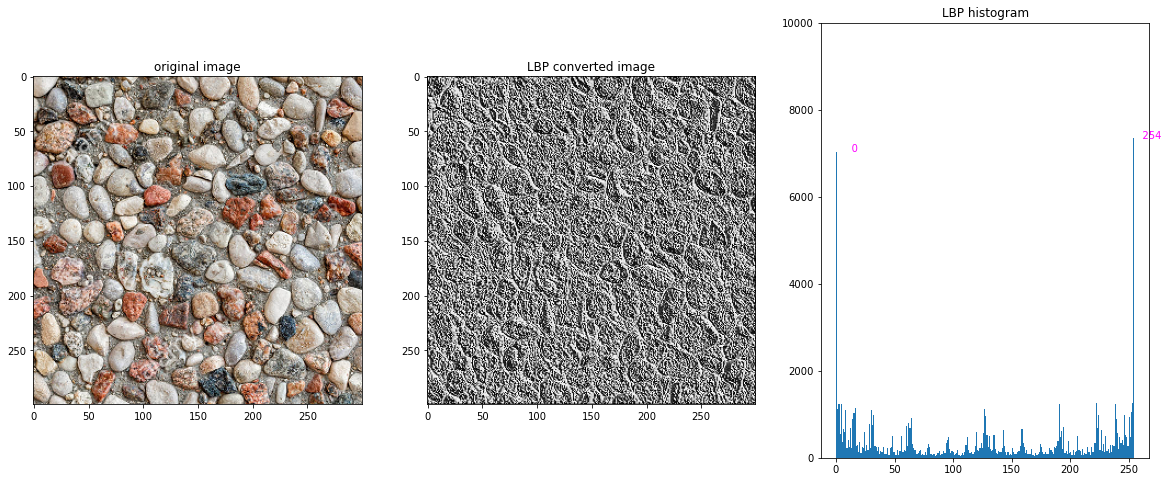

In [9]:
#leo imagen original
img_ori1 = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/piedras1.png')
#leo imagen en escala de grises
img_gray1 = carga_imagen_gray(img_ori1)
plt.rcParams["figure.figsize"]=(16,9)



#obtengo el size de la imagen original
height, width, _ = img_ori1.shape 

#creo array con el mismo height y width de la imagen original
img_lbp1 = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp1[i, j] = lbp_calculated_pixel(img_gray1, i, j) 
        

vectorLBP = img_lbp1.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori1)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp1,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,10000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

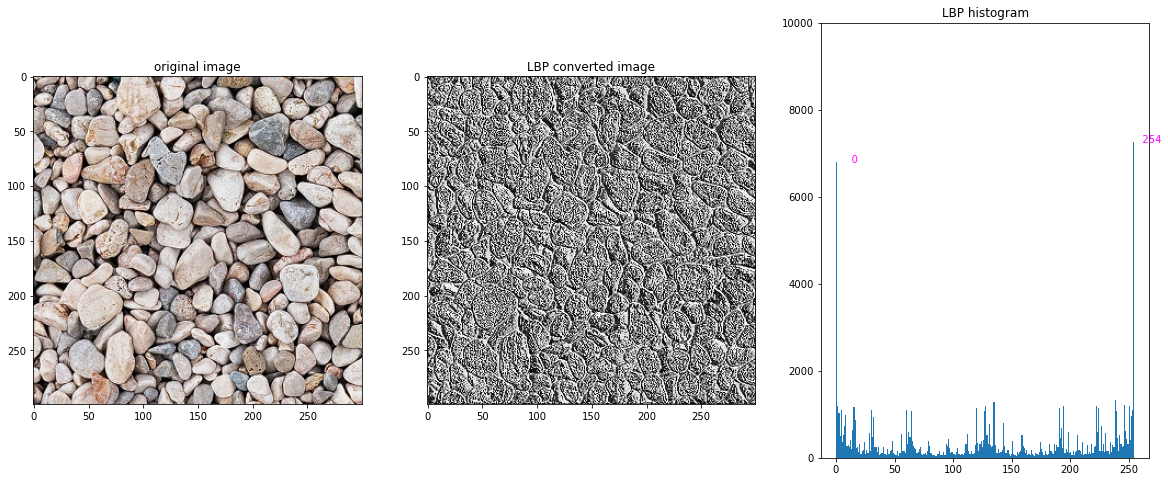

In [4]:
#leo imagen original
img_ori1 = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/piedras2.png')
#leo imagen en escala de grises
img_gray1 = carga_imagen_gray(img_ori1)
plt.rcParams["figure.figsize"]=(16,9)



#obtengo el size de la imagen original
height, width, _ = img_ori1.shape 

#creo array con el mismo height y width de la imagen original
img_lbp1 = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp1[i, j] = lbp_calculated_pixel(img_gray1, i, j) 
        

vectorLBP = img_lbp1.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori1)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp1,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,10000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

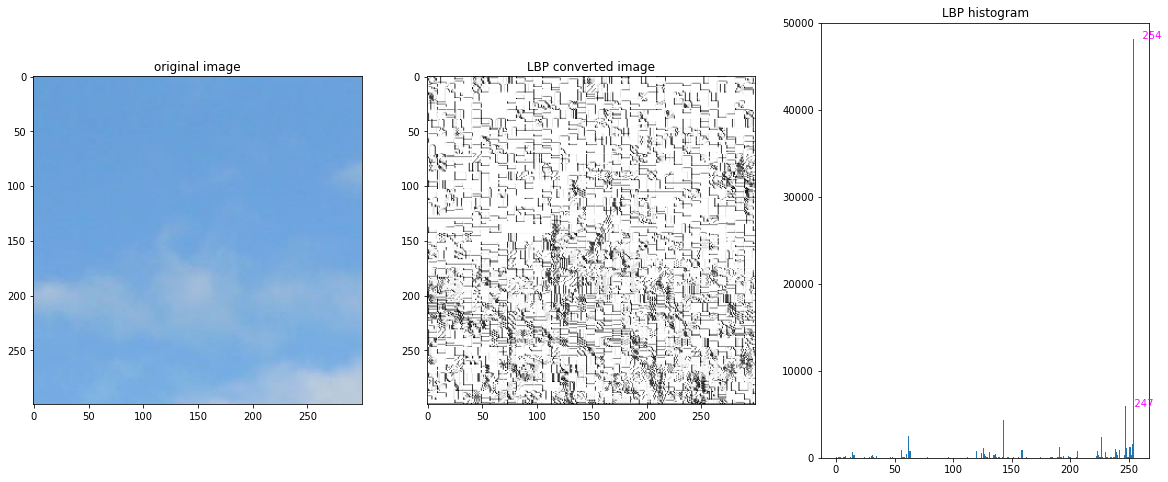

In [5]:
#leo imagen original
img_ori1 = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/cielo.png')
#leo imagen en escala de grises
img_gray1 = carga_imagen_gray(img_ori1)
plt.rcParams["figure.figsize"]=(16,9)



#obtengo el size de la imagen original
height, width, _ = img_ori1.shape 

#creo array con el mismo height y width de la imagen original
img_lbp1 = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp1[i, j] = lbp_calculated_pixel(img_gray1, i, j) 
        

        
vectorLBP = img_lbp1.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori1)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp1,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,50000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

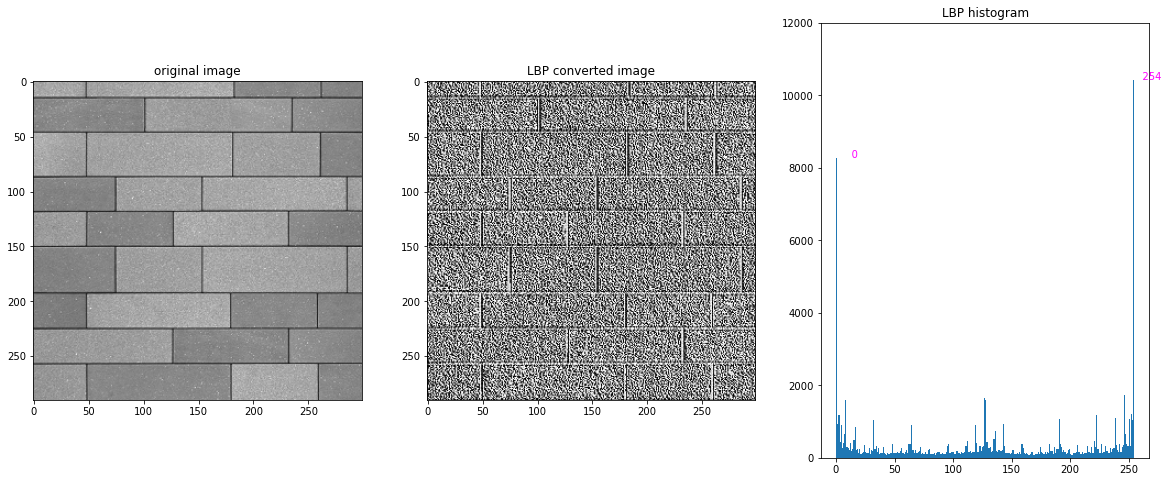

In [6]:
#leo imagen original
img_ori1 = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/ladrillos1.png')
#leo imagen en escala de grises
img_gray1 = carga_imagen_gray(img_ori1)
plt.rcParams["figure.figsize"]=(16,9)



#obtengo el size de la imagen original
height, width, _ = img_ori1.shape 

#creo array con el mismo height y width de la imagen original
img_lbp1 = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp1[i, j] = lbp_calculated_pixel(img_gray1, i, j) 

    
vectorLBP = img_lbp1.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori1)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp1,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,12000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

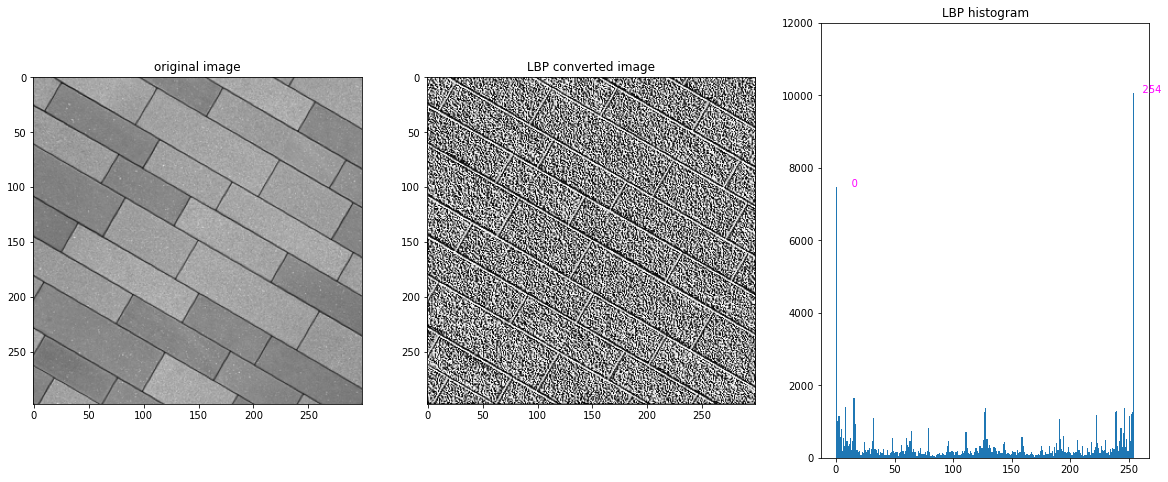

In [7]:
#leo imagen original
img_ori1 = carga_imagen_rgb('C:/Users/Paola Mariscal/Downloads/ladrillos2.png')
#leo imagen en escala de grises
img_gray1 = carga_imagen_gray(img_ori1)
plt.rcParams["figure.figsize"]=(16,9)



#obtengo el size de la imagen original
height, width, _ = img_ori1.shape 

#creo array con el mismo height y width de la imagen original
img_lbp1 = np.zeros((height, width), np.uint8) 

#calculo el valor del pixel vecino para cada pixel central
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp1[i, j] = lbp_calculated_pixel(img_gray1, i, j) 
        
vectorLBP = img_lbp1.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8)) #subplotting the gray, LBP and histogram 

ax  = fig.add_subplot(1,3,1)
ax.imshow(img_ori1)
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(img_lbp1,cmap="gray")
ax.set_title("LBP converted image")

ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,12000)
lbp = lbp[:-1]

## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()